In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import numpy as np

In [31]:
def prepare_hume_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [35]:
def merge_text_hume_data(df_hume, df_fer):
    df_merged = pd.merge(df_hume, df_fer, on=['start_patch'], how='inner').drop('start_patch', axis=1)
    return df_merged

In [32]:
def prepare_fer_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    #df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [28]:
def compare_csv_data(df1_name_hume, df2_name):
    # Read the CSV files into pandas DataFrames
    df1 = df1_name_hume
    df2 = df2_name
    
    # Extract the emotion columns from each DataFrame
    hume_emotions = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral']

    fer_emotions = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral']
    
    # # Iterate over the emotion columns and plot the data for each file
    # for emotion in hume_emotions:
    #     plt.figure()
    #     plt.plot(df1['hume_start_patch'], df1[emotion], label= str('hume'))
    #     plt.xlabel('Timestamp')
    #     plt.ylabel('Score')
    #     plt.title('Comparison of ' + emotion)
    #     plt.legend()
    #     plt.show()

    # for emotion in fer_emotions:
    #     plt.figure()
    #     plt.plot(df2['fer_start_patch'], df2[emotion], label= str('fer'))
    #     plt.xlabel('Timestamp')
    #     plt.ylabel('Score')
    #     plt.title('Comparison of ' + emotion)
    #     plt.legend()
    #     plt.show()

    plt.figure()
    plt.plot(df1['start_patch'], df1['hume_anger'], label= str('hume'))
    plt.plot(df2['start_patch'], df2['fer_anger'], label= str('fer'))
    plt.xlabel('Timestamp')
    plt.ylabel('Score')
    plt.title('Comparison of ' + 'Anger')
    plt.legend()
    plt.show()


In [6]:
def get_correlations_with_binary(df, binary_feature, continuous_features, corr_func= pearsonr ):
    df = df.dropna()
    correlation_data = []
    for feature in continuous_features:
        corr, p_value = corr_func(df[feature], df[binary_feature])
        correlation_data.append((feature, corr, p_value))
    
    data = correlation_data
    # Extract feature names, correlations, and p-values
    features = [item[0] for item in data]
    correlations = [item[1] for item in data]
    p_values = [item[2] for item in data]

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the correlations as vertical bars
    ax.bar(features, correlations, color='steelblue')

    # Set the y-axis label
    ax.set_ylabel('Correlation')

    # Add horizontal gridlines
    ax.yaxis.grid(True)

    # Set the title
    ax.set_title('Correlation with Binary Variable')

    # Add error bars representing p-values
    ax.errorbar(features, correlations, yerr=np.abs(correlations), fmt='none', color='black', capsize=5, label='p-value')

    # Add p-values and absolute correlation values as text annotations
    for feature, correlation, p_value in zip(features, correlations, p_values):
        ax.text(feature, 0, f'p={p_value:.2f}', ha='center', va='bottom')
        ax.text(feature, correlation, f'{abs(correlation):.2f}', ha='center', va='top')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()
    return data

In [33]:
df_hume_1 = prepare_hume_data('../data/hume/processed/Cuban_vocals_afternoon.csv')

In [34]:
df_fer_1 = prepare_fer_data('../data/FER_Output/processed/Cuban_vocals_afternoon.csv')

In [36]:
df = merge_text_hume_data(df_hume_1, df_fer_1)

In [41]:
df.head(5)

,hume_anger,hume_disgust,hume_fear,hume_joy,hume_sadness,hume_surprise,hume_neutral,fer_anger,fer_disgust,fer_fear,fer_joy,fer_sadness,fer_surprise,fer_neutral
0,0.080229,0.118816,0.136176,0.162982,0.152095,0.092143,0.228988,0.067686,0.001125,0.070315,0.334529,0.175410,0.021016,0.329175
1,0.071581,0.151962,0.163758,0.079768,0.229175,0.084195,0.254804,0.050904,0.000098,0.085481,0.346783,0.243870,0.021987,0.250494
2,0.078854,0.143309,0.152117,0.116091,0.194307,0.089055,0.243884,0.046936,0.000289,0.060309,0.300592,0.259693,0.026629,0.304703
3,0.075519,0.135794,0.155839,0.116950,0.196756,0.088541,0.228531,0.073927,0.000489,0.081842,0.273829,0.267290,0.036310,0.265434
4,0.069351,0.132777,0.140830,0.152588,0.171982,0.091472,0.208141,0.060674,0.000330,0.064093,0.409679,0.204057,0.026334,0.233983


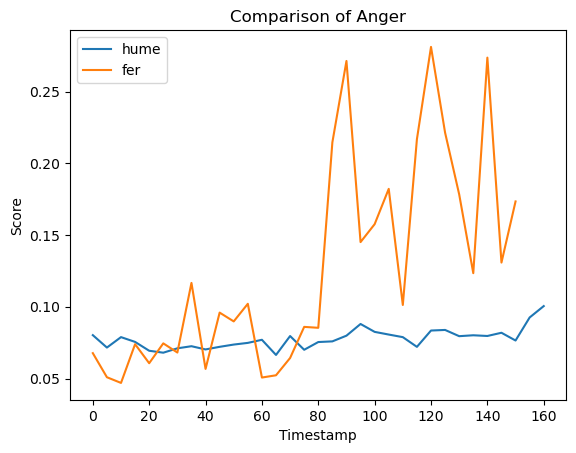

In [29]:
compare_csv_data(df_hume_1, df_fer_1)

In [ ]:
df_hume_2 = prepare_hume_data('../data/hume/processed/Cuban_vocals_morning.csv')

In [ ]:
compare_csv_data(df_hume_2, '../data/FER_Output/processed/Cuban_vocals_morning.csv')

In [ ]:
df_hume_3 = prepare_hume_data('../data/hume/processed/Funk_band_morning.csv')

In [ ]:
compare_csv_data(df_hume_3, '../data/FER_Output/processed/Funk_band_morning.csv')

In [ ]:
df_hume_4 = prepare_hume_data('../data/hume/processed/Funk_rhythm_morning.csv')

In [ ]:
compare_csv_data(df_hume_4, '../data/FER_Output/processed/Funk_rhythm_morning.csv')